# Prediction of Agriculture Crop Production in India

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19416\3945295211.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


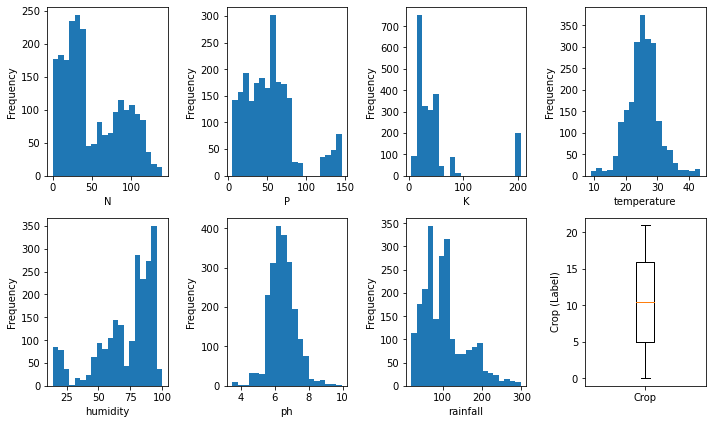

Enter the following details to predict crop production:
Nitrogen content (kg/ha): 40
Phosphorus content (kg/ha): 30
Potassium content (kg/ha): 40
Temperature (°C): 40
Humidity (%): 80
Soil pH: 6
Rainfall (mm): 200
Predicted Crop: mungbean


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load Crop_recommendation dataset
data = pd.read_csv('Crop_recommendation.csv')

# Handle missing values (fill NaN values with the mean of their respective columns)
data.fillna(data.mean(), inplace=True)

# Convert the 'Crop' column to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['Crop'])

# Separate features (X) and target variable (y)
X = data.drop('Crop', axis=1)
y = data['Crop']

# Set feature names explicitly in the DataFrame
X.columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Data Visualization
plt.figure(figsize=(10, 6))

# Histogram of each feature
for i, feature in enumerate(X.columns, 1):
    plt.subplot(2, 4, i)
    plt.hist(X[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Boxplot of target variable (Crop)
plt.subplot(2, 4, 8)
plt.boxplot(y)
plt.xticks([1], ['Crop'])
plt.ylabel('Crop (Label)')

plt.tight_layout()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to get dynamic input from the user
def get_user_input():
    print("Enter the following details to predict crop production:")
    nitrogen = float(input("Nitrogen content (kg/ha): "))
    phosphorus = float(input("Phosphorus content (kg/ha): "))
    potassium = float(input("Potassium content (kg/ha): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("Soil pH: "))
    rainfall = float(input("Rainfall (mm): "))
    return [nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]

# Get dynamic input from the user
user_input = get_user_input()

# Make a prediction using the trained model and user input
predicted_crop = model.predict([user_input])

# Convert the predicted numeric label back to the original crop name using the label encoder
predicted_crop_name = label_encoder.inverse_transform([int(predicted_crop[0])])[0]

print(f"Predicted Crop: {predicted_crop_name}")
